# THÀNH VIÊN
|MÃ SỐ|HỌ TÊN|
|:---------|:--------|
|19127481|TRẦN HOÀNG NAM|

In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from collections import OrderedDict

# TIỀN XỬ LÝ VÀ PHÂN TÍCH

In [2]:
df = pd.read_csv('churn.txt')
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

Nhìn sơ qua, chúng ta dễ dàng thấy được không có dữ liệu null, nên nhìn chung bộ dữ liệu này tạm thời không cần đến bước xoá dòng và cột

Theo thông tin được cung cấp từ file word, chúng ta thấy rằng Stage, Area Code, Phone,Int'l Plan, VMail Plan là kiểu dữ liệu category, do đó, chúng ta sẽ không xét min max các cột này, ngoài ra cột Phone đóng vai trò như cột id giữa mỗi khách hàng khác nhau, do đó chúng ta sẽ loại luôn cột Phone

In [4]:
cols = df.columns
categorical = ["State","Area Code", "Int'l Plan", "VMail Plan","CustServ Calls","Churn?"]
numerical = [col for col in cols if col not in categorical and col != 'Phone']

In [5]:
df[numerical].agg(['min','max'])

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge
min,1,0,0.0,0,0.00,0.0,0,0.00,23.2,33,1.04,0.0,0,0.0
max,243,51,350.8,165,59.64,363.7,170,30.91,395.0,175,17.77,20.0,20,5.4


Nhìn chung, tất cả các giá trị đều lớn hơn 0, do đó các giá trị này đều hợp lệ

XỬ LÝ BIẾN CATEGORY

Các cột category gồm:
- State: Tên viết tắt của bang
- Areacode: Mã khu vực
- Int'l Plan: Có đăng ký Int'l Plan không
- VMail Plan: Có đăng ký VMail Plan không

In [6]:
df['Area Code'] = df['Area Code'].astype(str) # Chuyển type của area code về dạng string để dễ dàng xử lý

XỬ LÝ BIẾN NUMERIC

Các cột numeric gồm:
- Day mins: Tổng thời gian gọi vào buổi sáng
- Day calls: Số lượng cuộc gọi vào buổi sáng
- Day Charge: Tổng số tiền phải trả cho buổi sáng
- Eve mins: Tổng thời gian gọi vào buổi trưa chiều
- Eve calls: Số lượng cuộc gọi vào buổi trưa chiều
- Eve Charge: Tổng số tiền phải trả cho buổi chiều
- Night mins: Tổng thời gian gọi vào buổi tối
- Night calls: Số lượng cuộc gọi vào buổi tối
- Night Charge: Tổng số tiền phải trả cho buổi tối
- Intl mins: Tổng thời gian gọi quốc tế
- Intl calls: Số lượng cuộc gọi quốc tế
- Intl Charge: Tổng số tiền phải trả cho cuộc gọi quốc tế
- CustSerCall

Chúng ta sẽ chuyển dạng numeric về dạng rời rạc (categorical) theo 3 mức độ là low, medium, high
Ta có nhận xét: rằng số tiền phải trả mỗi buổi phụ thuộc vào tổng số thời gian gọi vào mỗi buổi, do đó, chúng ta sẽ không xét tới cột số tiền trả vào mỗi buổi mà chỉ xét tống thời lượng cuộc gọi và số lượng cuộc gọi mỗi buổi

In [7]:
not_use_cols = ['Day Charge','Night Charge','Eve Charge','Intl Charge']
numerical = [col for col in numerical if col not in not_use_cols]

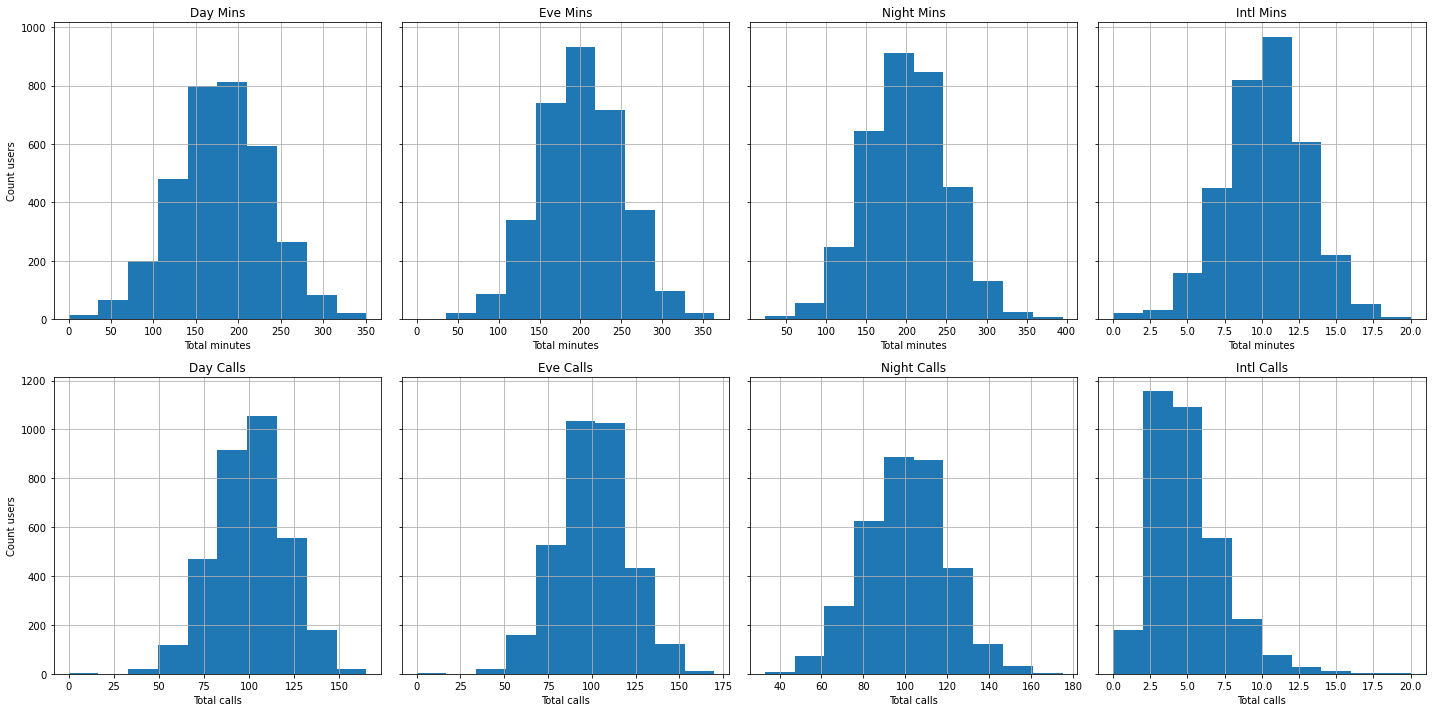

In [8]:
fig, ax = plt.subplots(2,4, sharey='row',figsize=(20,10))
cols = ['Day Mins','Eve Mins','Night Mins','Intl Mins',
        'Day Calls','Eve Calls','Night Calls','Intl Calls']
for i in range(len(cols)):
    ax[int(i/4)][i%4].set_title(cols[i])
    df[cols[i]].hist(ax=ax[int(i/4)][i%4])
    if (i%4)==0:
        ax[int(i/4)][i%4].set_ylabel("Count users")
    if int(i/4)==0:
        ax[int(i/4)][i%4].set_xlabel("Total minutes")
    elif int(i/4)==1:
        ax[int(i/4)][i%4].set_xlabel("Total calls")
fig.tight_layout()
plt.show()

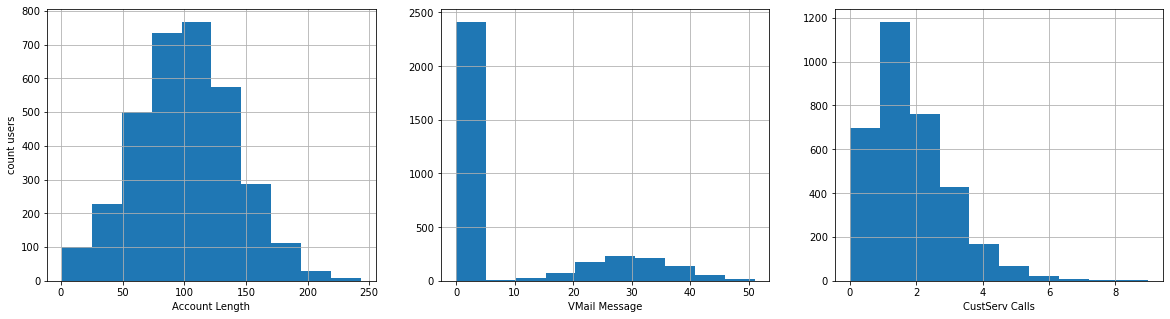

In [9]:
cols = ['Account Length', 'VMail Message', 'CustServ Calls']
fig, ax = plt.subplots(1,3,figsize=(20,5))
for i in range(len(cols)):
    if(i==0):
        ax[i].set_ylabel("count users")
    df[cols[i]].hist(ax=ax[i])
    ax[i].set_xlabel(cols[i])

Nhận xét chung về các biểu đồ trên, chúng ta nhận thấy rằng mỗi buổi sẽ có tổng số minutes và số tổng số call khác nhau, do đó, chúng ta sẽ tiến hành phân loại low, medium, high tuỳ thuộc vào biểu đồ

In [10]:
# Giải thích: Ở đây chúng ta dùng mảng cổ định 2 phần tử là khoảng medium, nếu số lượng thấp hơn khoảng medium thì sẽ là low, ngược lại là high
changes_col = { 'Day Mins':[100,250],
                'Eve Mins':[150,250],
                'Night Mins':[150,250],
                'Intl Mins':[5,16],
                'Day Calls':[60,125],
                'Eve Calls':[60,125],
                'Night Calls':[60,125],
                'Intl Calls':[2,10],
                'Account Length':[50,175],
                'VMail Message':[0,20],
                'CustServ Calls':[0,3]
            }

In [11]:
temp = df.copy()
for key,range_medium in changes_col.items():

    transactions = df[key]<range_medium[0]
    temp.loc[transactions, key] = 'low'

    transactions = df[key]>range_medium[1]
    temp.loc[transactions, key] = 'high'

    transactions = (df[key]<=range_medium[1]) & (df[key]>=range_medium[0])
    temp.loc[transactions, key] = 'medium'
df = temp


BẢNG DỮ LIỆU SAU KHI XỬ LÝ

In [12]:
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,medium,415,382-4657,no,yes,high,high,medium,45.07,...,medium,16.78,medium,medium,11.01,medium,medium,2.70,medium,False.
1,OH,medium,415,371-7191,no,yes,high,medium,medium,27.47,...,medium,16.62,high,medium,11.45,medium,medium,3.70,medium,False.
2,NJ,medium,415,358-1921,no,no,medium,medium,medium,41.38,...,medium,10.30,medium,medium,7.32,medium,medium,3.29,medium,False.
3,OH,medium,408,375-9999,yes,no,medium,high,medium,50.90,...,medium,5.26,medium,medium,8.86,medium,medium,1.78,medium,False.
4,OK,medium,415,330-6626,yes,no,medium,medium,medium,28.34,...,medium,12.61,medium,medium,8.41,medium,medium,2.73,medium,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,high,415,414-4276,no,yes,high,medium,medium,26.55,...,high,18.32,high,medium,12.56,medium,medium,2.67,medium,False.
3329,WV,medium,415,370-3271,no,no,medium,medium,low,39.29,...,low,13.04,medium,medium,8.61,medium,medium,2.59,medium,False.
3330,RI,low,510,328-8230,no,no,medium,medium,medium,30.74,...,low,24.55,medium,medium,8.64,medium,medium,3.81,medium,False.
3331,CT,high,510,364-6381,yes,no,medium,medium,medium,36.35,...,medium,13.57,low,high,6.26,medium,medium,1.35,medium,False.


# KHAI THÁC DỮ LIỆU

### CÁC CÂU HỎI CẦN GIẢI QUYẾT
-	Câu 1: Liệu vị trí có ảnh hưởng đến số lượng cuộc gọi hay không?
-	Câu 2:Các yếu tố ảnh hưởng tới việc người dung tiếp tục sử dụng dịch vụ
-	Câu 3: Người gọi nhiều cuộc gọi thì có khả năng cao sẽ gọi hỗ trợ hơn



### PHƯƠNG HƯỚNG XỬ LÝ
	Câu 1: Vị trí ảnh hưởng số lượng cuộc gọi => luật kết hợp State -> Calls có đáp ứng được độ tin cậy hay không
	Câu 2: Yếu tố ảnh hưởng tới việc người dung sử dụng dịch vụ => Luật kết hợp (Unknow columns) -> Churn? 
	Câu 3: Người gọi nhiều cuộc gọi thì sẽ gọi hỗ trợ => Luật kết hợp Calls -> CustSerCall có đáp ứng độ tin cậy hay không

    Chúng ta nhận thấy rằng để giải quyết cả 3 câu hỏi trên, chúng ta cần phải khai thác tập phổ biến và luật kết hợp. Để đơn giản chúng ta sẽ dùng thuật toán apriori để khai thác dữ liệu

#### CHUẨN BỊ
- Như đã phân tích ở phía trên, các cột tiền trả phụ thuộc vào tổng thời lượng gọi của mỗi buổi, do đó, chúng ta sẽ loại các cột này khỏi danh sách
- Thêm một lưu ý là Phone đóng vai trò như 1 ID duy nhất nên chúng ta sẽ không thu được gì từ cột này, vì thế chúng ta cũng sẽ loại bỏ cột Phone khỏi danh sách xử lý


In [13]:
min_confidence = 0.8
min_supp = 0.8
cols = list(df.columns)
cols.remove("Day Charge")
cols.remove("Eve Charge")
cols.remove("Night Charge")
cols.remove("Intl Charge")
cols.remove("Phone")

#### KHAI THÁC TẬP PHỔ BIẾN
- Hàm frequence được viết dùng để đếm tần số xuất hiện của 1 tập các yếu tố trong dataframe
- Hàm gồm 2 tham số:
    - df: là Dataframe - dữ liệu chính của chúng ta
    - target_list: là tập hợp mà chúng ta muốn đếm số lần xuất hiện trong dataframe
        - target có dạng [['Area code','415'],['Night Mins','medium']]

In [14]:
def frequency(df,target_list):
    for value in target_list:
        df = df[df[value[0]]==value[1]]
    return len(df)

- Hàm combine_pre được dùng để kiểm tra xem các subset của ứng viên(candidate) có nằm trong tập phổ biến không và trả về True hoặc False
- Hàm nhận vào 2 tham số:
    - F: là bảng kết quả tập phổ biến hiện tại
    - target: là tập hợp mà chúng ta muốn kiểm tra xem subset có kich thước size(target)-1 có tồn tại trong F hay không 

In [15]:
def combine_pre_check(F,target):
    positions = [x for x in range(0,len(target))]
    comb = combinations(positions,len(target)-1)
    for set_item in comb:
        list_item = [target[x] for x in set_item]
        if(list_item not in F[len(target)-1]):
            return False
    return True

- Hàm init khởi tạo bảng giá trị F1, nguyên do là trước F1 là F0 là rỗng, vì thế, F1 được xem như 1 trường hợp đặc biệt được khởi tạo riêng
- Hàm chỉ có 1 tham số nhận vào
    - df: là dataframe dữ liệu, hàm sẽ trả về kết quả có dạng như sau result = 
    [
        [['Account Length', 'medium']],
        [['Churn?', 'False.']],
        [['CustServ Calls', 'medium']],
    ]
    - Giải thích về dạng dữ liệu trên, mỗi item là một list:
        - Ví dụ result[0] = [['Account Length', 'medium']]
        - Giả sử sau này chúng ta muốn tăng số lượng item trong list từ result[0] thì sẽ có dạng như sau [['Account Length', 'medium'], ['CustServ Calls', 'medium']]

In [16]:
def init(df):
    F1 = []
    n = len(df)
    for col in cols:
        status = list(np.unique(df[col]))
        for x in status:
            list_item = []
            if frequency(df,[[col,x]])/n>=min_supp:
                list_item = [[col,x]]
                F1.append(list_item)
    return sorted(F1)

- Hàm generate_popular là hàm khai thác tập phổ biến
- Hàm nhận 3 tham số:
    - df: Dataframe
    - F: Bảng kết quả dùng để lấy kết quả cũ để tìm kết quả mới và lưu lại
    - size: kích thước tập phổ biến đang tìm hiện tại
    - Hàm này chỉ tìm các tập phổ biến có kích thước từ 2 trở lên do tập chỉ có 1 phần tử đã được tìm ở hàm init

In [17]:
def generate_popular(df,F,size):
    n = len(F[size-1])
    if n <= 1:
        return
    F_size = []
    for i in range(n-1):
        for j in range(i+1,n):
            if(F[size-1][i][0:-1]==F[size-1][j][0:-1] and F[size-1][i][-1][0]!=F[size-1][j][-1][0]):
                candidate = F[size-1][i][:]
                candidate.append(F[size-1][j][-1])
                k = frequency(df,candidate)/len(df)
                if(combine_pre_check(F,candidate)==False):               # Tỉa nhánh
                    continue
                if k>=min_supp:                                         # Lọc bằng min_supp
                    F_size.append(candidate)
                
    F.append(F_size)
    generate_popular(df,F,size+1)


In [18]:
def apriori(df):
    F = [[],init(df)]
    generate_popular(df,F,2)
    return F

In [19]:
F = apriori(df)

In [20]:
with open('popular_set.txt','w') as popular_file:
    for popular_size in F:
        for popular in popular_size:
            s = ""
            for item in popular:
                s+= f'{item[0]}: {item[1]}, '
            s = s[:-2]
            s+= '\n'
            popular_file.write(s)

#### KHAI THÁC LUẬT KẾT HỢP

In [21]:
# Biến rules là biến global, dùng để lưu tập hợp các luật kết hợp
rules = []

- Hàm candidate_gen dùng để phát sinh tiên đề và hệ quả

In [22]:
def candidate_gen(f_k,h):
    premise = []
    consequences = []
    origin_h = h[:]
    origin_f_k=f_k[:]
    for i in range(len(h)):
        for j in range(i+1,len(h)):
            if h[i][:-1]==h[j][:-1]:
                temp_consequences = h[i][:]
                temp_consequences.append(h[j][-1])
                last_premise = f_k[:]
                for consequence in temp_consequences:
                    last_premise.remove(consequence)
                if len(last_premise)>0:
                    premise.append(last_premise)
                    consequences.append(temp_consequences)
    return premise,consequences

- Hàm gen_rules và ap_gen_rules được viết dựa theo mã giả được cung cấp trong slide, sẽ generate ra các rule

In [23]:
def ap_gen_rules(f_k,H,count_premise):
    if(len(f_k)>1 and len(H)!=0):
        premises, consequences = candidate_gen(f_k,H)
        for premise, consequence in zip(premises,consequences):
            if count_premise/frequency(df,consequence)<min_confidence:
                premises.remove(premise)
                consequences.remove(consequence)
            else:
                rules.append([premise,consequence])
        
        ap_gen_rules(f_k,consequences,count_premise)

In [24]:
def genRules(F):
    for i in range(2,len(F)):
        for f_k in F[i]:
            origin_f_k=f_k[:]
            f_k_count = frequency(df,f_k)
            H = []
            for i in range(len(f_k)):
                h=[]
                h.append(f_k[i])
                f_k.remove(f_k[i])
                f_pre = frequency(df,h)
                if f_k_count/f_pre>=min_confidence:  
                    rules.append([f_k,h])
                    H.append(h)
                f_k=origin_f_k[:]
            ap_gen_rules(f_k,H,f_k_count)

In [25]:
genRules(F)

In [26]:
with open('rules.txt','w') as rules_file:
    for rule in rules:
        s = ""
        for item in rule[0]:
            s+=f'{item[0]}: {item[1]}, '
        s=s[:-2]
        s+="   ->   "
        for item in rule[1]:
            s+=f'{item[0]}: {item[1]}, '
        s=s[:-2]
        s+='\n'
        rules_file.write(s)

#### TRẢ LỜI CÂU HỎI
	Câu 1: Vị trí ảnh hưởng số lượng cuộc gọi => luật kết hợp State -> Calls có đáp ứng được độ tin cậy hay không?
	

In [27]:
for rule in rules:
    for item in rule[0]:
        if('State' in item):
            print(f'{rule[0]}: {rule[1]}')
            break


Nhận xét: Có vẻ như với luật kết hợp State, Calls không đáp ứng được độ tin cậy hoặc độ đếm trợ, vì thế, vị trí có ảnh hưởng tới độ tin cậy hay không thì tạm thời chúng ta chỉ có thể chấp nhận rằng khu vực không ảnh hưởng đến số lượng cuộc gọi

	Câu 2: Yếu tố ảnh hưởng tới việc người dung sử dụng dịch vụ => Luật kết hợp (Unknow columns) -> Churn? 

In [28]:
for rule in rules:
    for item in rule[1]:
        if('Churn?' in item):
            print(f'{rule[0]}   ->   {rule[1]}')
            break

[['CustServ Calls', 'medium']]   ->   [['Churn?', 'False.']]
[['Intl Mins', 'medium']]   ->   [['Churn?', 'False.']]


Nhận xét, chúng ta thấy rằng, với độ tin cậy 80% và độ trợ 80% thì có vẻ như với những người có số lượng CustSerc Calls ở mức độ bình thường thì không ngừng sử dụng dịch vụ

	Câu 3: Người gọi nhiều cuộc gọi thì sẽ gọi hỗ trợ => Luật kết hợp Calls -> CustSerCall có đáp ứng độ tin cậy hay không

In [29]:
for rule in rules:
    for item in rule[1]:
        if('Day Calls' in item or 'Eve Calls' in item or 'Night Calls' in item):
            print(f'{rule[0]}   ->   {rule[1]}')
            break

[['CustServ Calls', 'medium']]   ->   [['Day Calls', 'medium']]
[['CustServ Calls', 'medium']]   ->   [['Eve Calls', 'medium']]
[['CustServ Calls', 'medium']]   ->   [['Night Calls', 'medium']]
[['Intl Calls', 'medium']]   ->   [['Day Calls', 'medium']]
[['Intl Mins', 'medium']]   ->   [['Day Calls', 'medium']]
[['Intl Calls', 'medium']]   ->   [['Eve Calls', 'medium']]
[['Intl Mins', 'medium']]   ->   [['Eve Calls', 'medium']]
[["Int'l Plan", 'no']]   ->   [['Night Calls', 'medium']]
[['Intl Calls', 'medium']]   ->   [['Night Calls', 'medium']]
[['Intl Mins', 'medium']]   ->   [['Night Calls', 'medium']]


Từ kết quả trên, chúng ta thấy rằng có vẻ như người gọi CustServ Calls ở mức bình thường thì thường có số lượng call ở mức bình thường, nhưng ngược lại thì không